In [1]:
import math


def sigmoid(z):
    """ Sigmoid function """
    return 1.0 / (1.0 + math.exp(-z))


def hypothesis(theta, x):
    """ Hypothesis function """
    return sigmoid(sum([theta[i] * x[i] for i in range(len(x))]))


def cost(x, y, theta):
    """ Cost function """
    m = len(x)
    cost = 0.0
    for i in range(m):
        h = hypothesis(theta, x[i])
        cost += -y[i] * math.log(h) - (1 - y[i]) * math.log(1 - h)
    return cost / m


def gradient(x, y, theta):
    """ Gradient of the cost function """
    m = len(x) # number of training examples
    n = len(x[0]) # number of features
    grad = [0.0] * n
    for j in range(n):
        temp = 0.0
        for i in range(m):
            temp += (hypothesis(theta, x[i]) - y[i]) * x[i][j]
        grad[j] = temp / m
    return grad


def gradient_descent(x, y, theta, alpha, num_iters):
    """ Gradient descent algorithm """
    n = len(x[0])
    for i in range(num_iters):
        grad = gradient(x, y, theta)
        theta = [theta[i] - alpha * grad[i] for i in range(n)]
        if i % 500 == 0:
            print('Cost at iteration', i, ':', cost(x, y, theta))

    return theta

Text(0.5, 1.0, 'Generated Data')

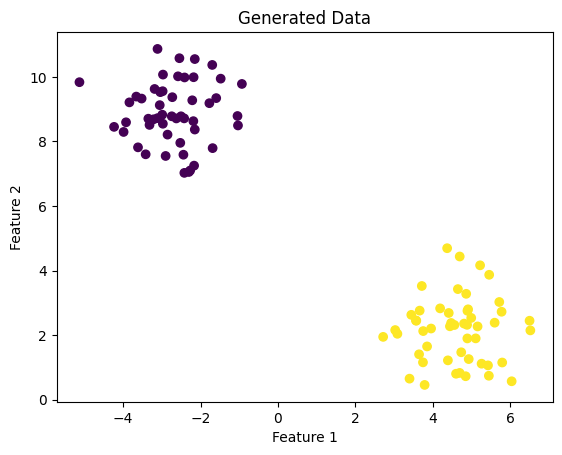

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# 生成二分类数据
X, y = make_blobs(n_samples=100,    # 样本总数
                  centers=2,        # 类别数，即聚类中心数
                  n_features=2,     # 特征数，即数据维度
                  random_state=42)  # 随机种子，确保每次生成相同的数据

# 可视化生成的数据
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Data')

In [4]:
m = len(X)
new_X = [[1.0] + list(X[i]) for i in range(m)]
n = len(new_X[0])
theta = [0.0] * n
alpha = 0.001
iterations = 20000

theta = gradient_descent(new_X, y, theta, alpha, iterations)

Cost at iteration 0 : 0.6870104422089222
Cost at iteration 500 : 0.1292355382409839
Cost at iteration 1000 : 0.07019069553713092
Cost at iteration 1500 : 0.04825739908626938
Cost at iteration 2000 : 0.03687148944032362
Cost at iteration 2500 : 0.029899856738271672
Cost at iteration 3000 : 0.025188451220718378
Cost at iteration 3500 : 0.02178842190036309
Cost at iteration 4000 : 0.01921706419163032
Cost at iteration 4500 : 0.01720291633625439
Cost at iteration 5000 : 0.01558158127403455
Cost at iteration 5500 : 0.014247658789903533
Cost at iteration 6000 : 0.013130441967406006
Cost at iteration 6500 : 0.012180715735686118
Cost at iteration 7000 : 0.011363159255768529
Cost at iteration 7500 : 0.010651760002473046
Cost at iteration 8000 : 0.010026932775512937
Cost at iteration 8500 : 0.009473647091000018
Cost at iteration 9000 : 0.008980173736390285
Cost at iteration 9500 : 0.008537224021567546
Cost at iteration 10000 : 0.008137345245877661
Cost at iteration 10500 : 0.007774487560871302
C

Text(0.5, 1.0, 'Generated Data')

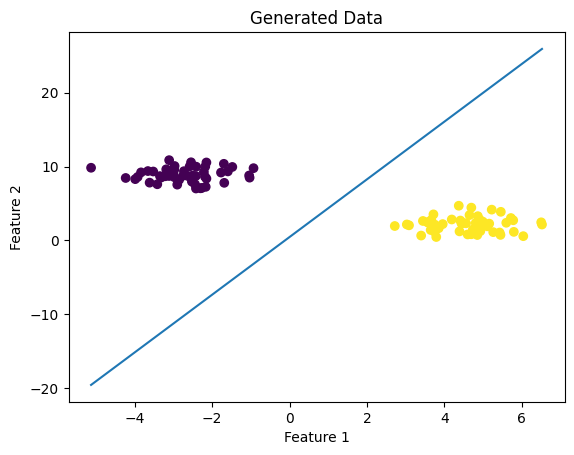

In [11]:
# 根据 theta 值绘制决策边界
x_values = [min(X[:, 0]), max(X[:, 0])]
y_values = [(-theta[0] - theta[1] * x) / theta[2] for x in x_values]
plt.plot(x_values, y_values, label='Decision Boundary')

# 可视化生成的数据
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Data')